(580, 705)


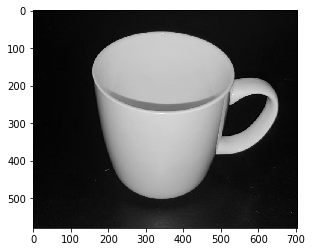

In [7]:
# Read the image
import skimage.io

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import math

#image = skimage.io.imread('circle.jpg', as_grey=True)
#image = skimage.io.imread('grey_scale.jpg', as_grey=True)
image = skimage.io.imread('coffee.jpg', as_grey=True)

plt.imshow(image, cmap='gray')
print(image.shape)

In [8]:
tf.reset_default_graph()

# Fill in the kernel here!
# Write the kernel weights as a 2D array. 
kernel_h = np.array([3, 3])
kernel_h = [ [1,2,1], [0,0,0], [-1,-2,-1] ]

kernel_v = np.array([3, 3])
kernel_v = [ [1,0,1], [2,0,-2], [-1,0,-1] ]

# Kernel weights
#conv_w = tf.constant(np.ones((2, 2)), dtype=tf.float32, shape=(2, 2, 1, 1))

if len(kernel_h) == 0 or len(kernel_v) == 0:
    print('Please specify the kernel!')

input_placeholder = tf.placeholder(
    dtype=tf.float32, shape=(1, image.shape[0], image.shape[1], 1))

with tf.name_scope('convolution'):
    conv_w_h = tf.constant(kernel_h, dtype=tf.float32, shape=(3, 3, 1, 1))
    conv_w_v = tf.constant(kernel_v, dtype=tf.float32, shape=(3, 3, 1, 1))    
    output_h = tf.nn.conv2d(input=input_placeholder, filter=conv_w_h, strides=[1, 1, 1, 1], padding='SAME')
    output_v = tf.nn.conv2d(input=input_placeholder, filter=conv_w_v, strides=[1, 1, 1, 1], padding='SAME')

In [10]:
with tf.Session() as sess:
    result_h = sess.run(output_h, feed_dict={
            input_placeholder: image[np.newaxis, :, :, np.newaxis]})
    result_v = sess.run(output_v, feed_dict={
            input_placeholder: image[np.newaxis, :, :, np.newaxis]})

#plt.imshow(result_h[0, :, :, 0]) # view horisontaal edges
#plt.imshow(result_v[0, :, :, 0]) # view vertical edges


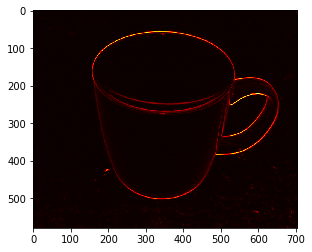

In [11]:
result_lenght = ((result_v**2) + (result_h**2))**0.5  
plt.imshow(result_lenght[0, :, :, 0], cmap='hot')

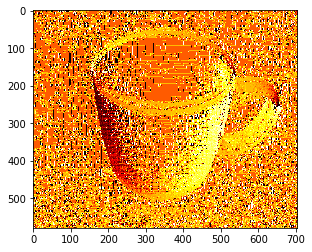

In [12]:
result_angle = (np.arctan(result_v/(result_h+0.00000001)))#*(2*math.pi)
plt.imshow(result_angle[0, :, :, 0], cmap='hot')

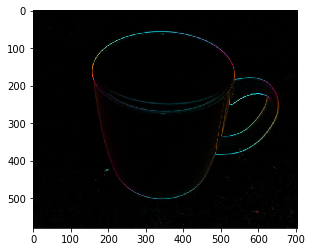

In [17]:
result_lenght_norm = (result_lenght[0,:,:,0] + (np.min(result_lenght)*-1) ) / (np.min(result_lenght)*-1 + np.max(result_lenght))
result_angle_norm = result_angle[0,:,:,0]

result_red = np.absolute(result_lenght_norm * np.cos(result_angle_norm+4.2))
result_green = np.absolute(result_lenght_norm * np.cos(result_angle_norm+2.1))
result_blue = np.absolute(result_lenght_norm * np.cos(result_angle_norm))

result_rgb = np.zeros((580,705,3))
result_rgb[...,0] = (result_red + (np.min(result_red)*-1) ) / (np.min(result_red)*-1 + np.max(result_red)) 
result_rgb[...,1] = (result_green + (np.min(result_green)*-1) ) / (np.min(result_green)*-1 + np.max(result_green)) 
result_rgb[...,2] = (result_blue + (np.min(result_blue)*-1) ) / (np.min(result_blue)*-1 + np.max(result_blue))



#result_rgb = np.dstack((result_red,result_green,result_blue)

#result_rgb
plt.imshow(result_rgb)